In [273]:
#importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

In [274]:
#Reading the data set
df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [275]:
df.shape

(8124, 23)

In [276]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [277]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Observations:
1. poisonous mushrooms: 3916
2. Edible mushrooms: 4208

In [278]:
for col in df.columns:
    print(col,'\n',df['cap-shape'].value_counts(),'\n')

class 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-surface 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-color 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

bruises 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

odor 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

gill-attachment 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

gill-spacing 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

gill-size 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

gill-color 
 x    3656
f    3152
k     828
b     452
s      32
c

Observations:
We have different category of data in each feature.

In [279]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


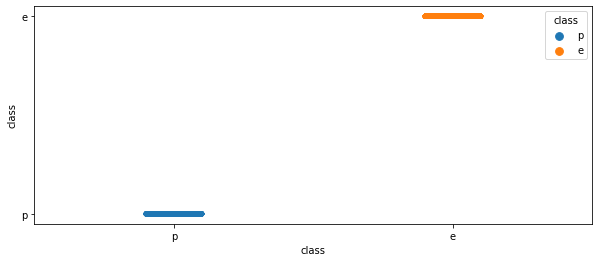

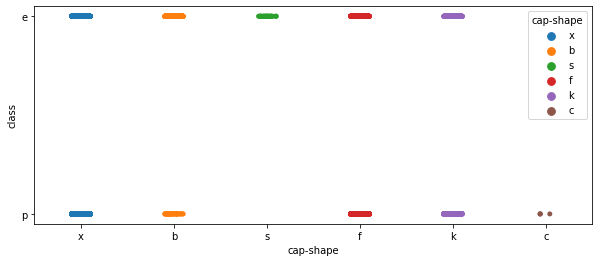

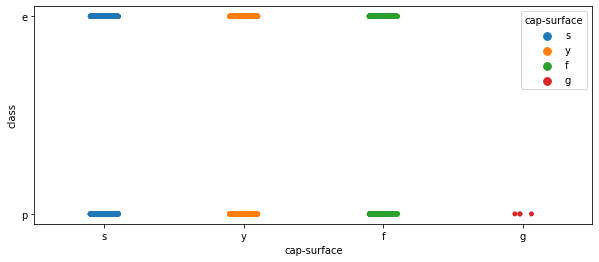

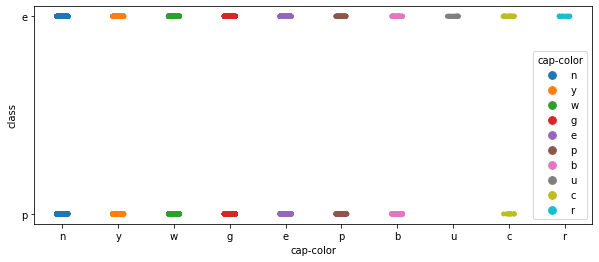

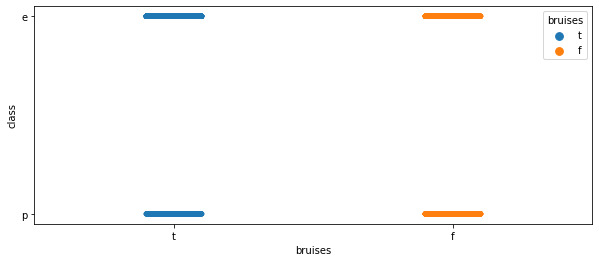

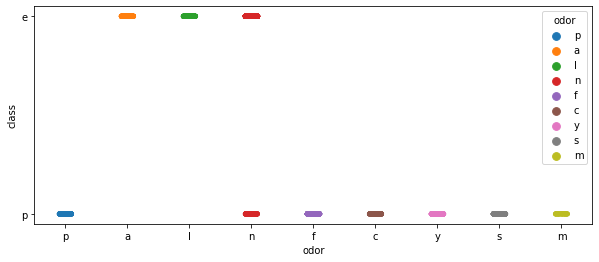

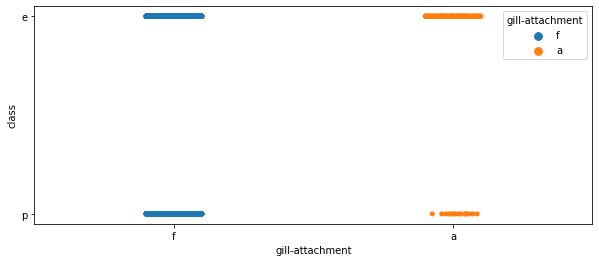

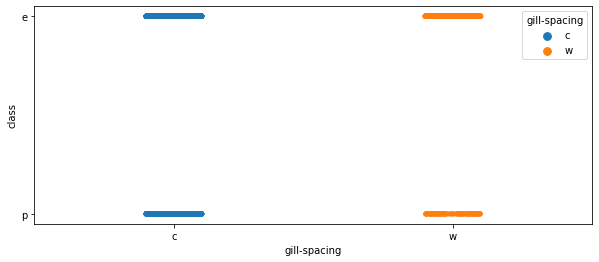

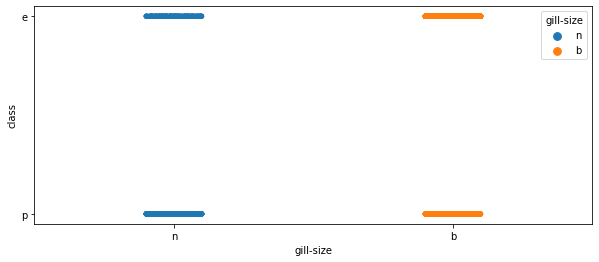

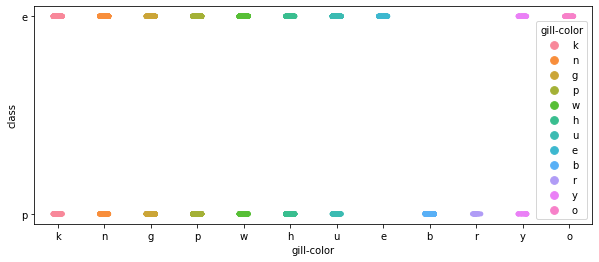

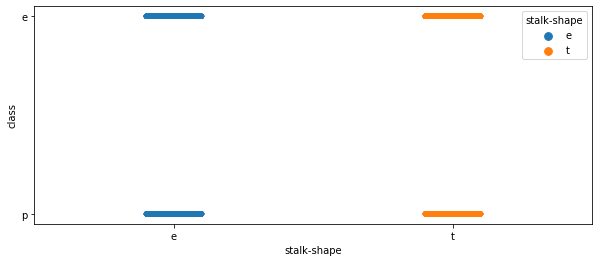

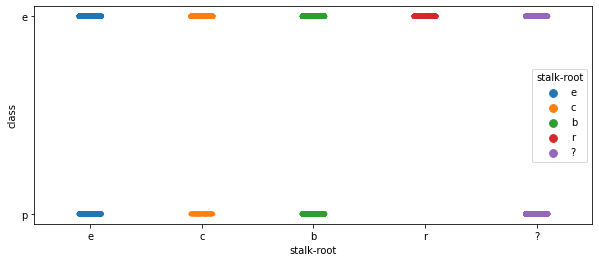

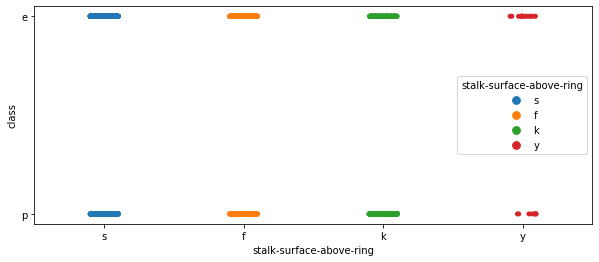

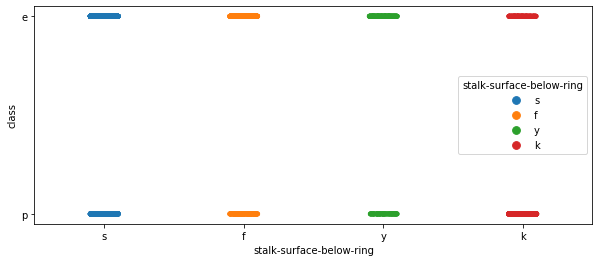

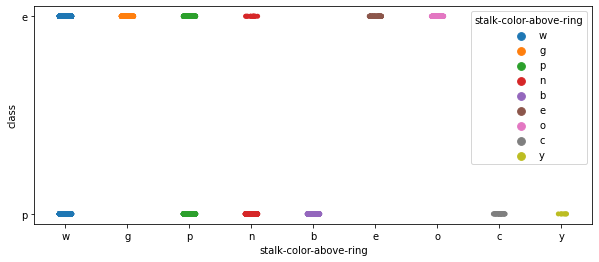

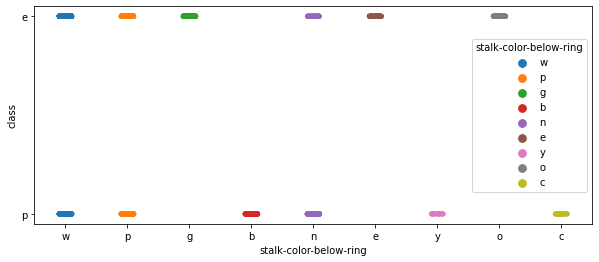

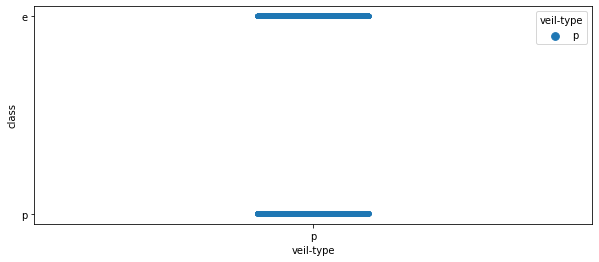

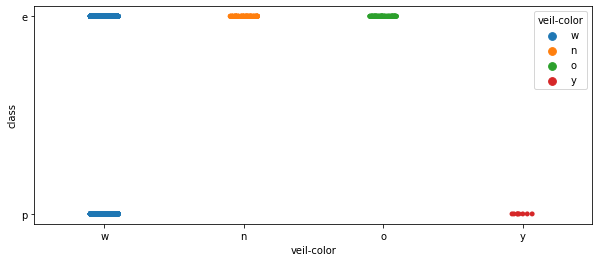

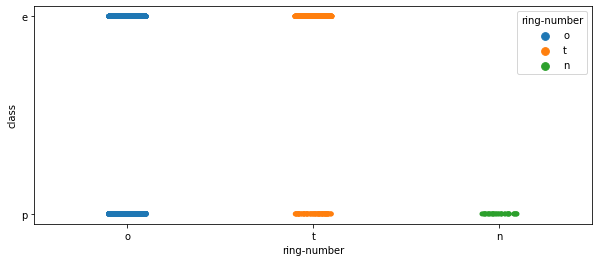

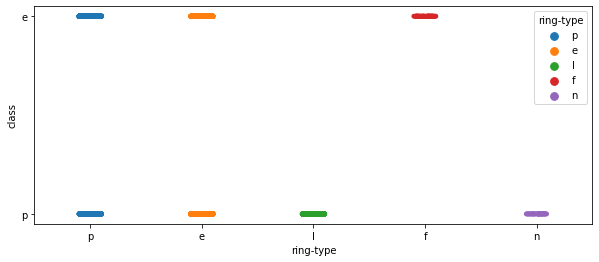

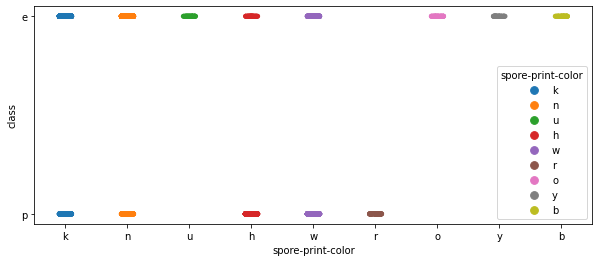

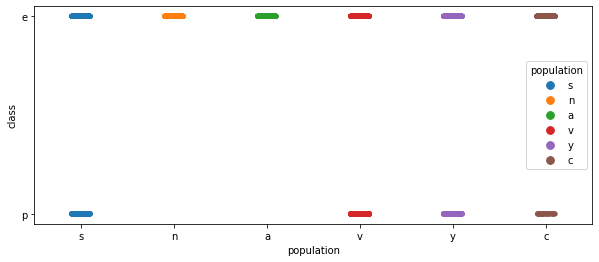

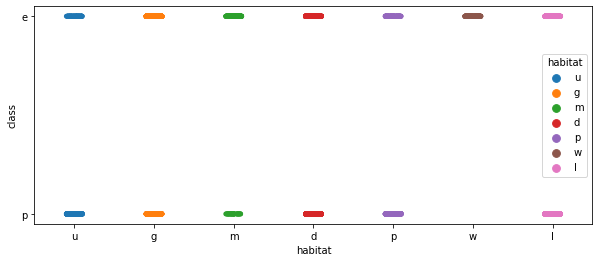

In [280]:
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.stripplot(x=col,y='class',data=df,hue=col)
    plt.xlabel(col)
    plt.ylabel('class')
    plt.show()

Observations
1. Could not see any trend in bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type

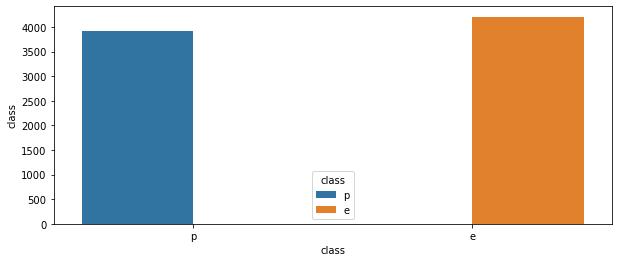

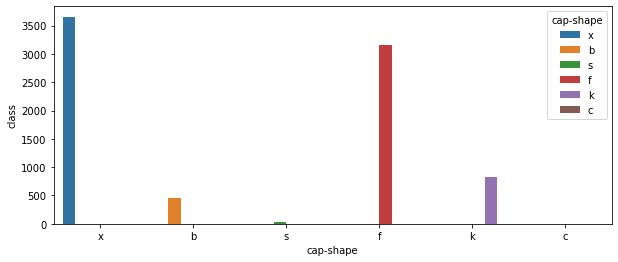

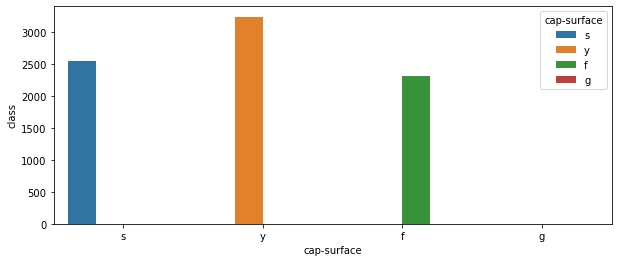

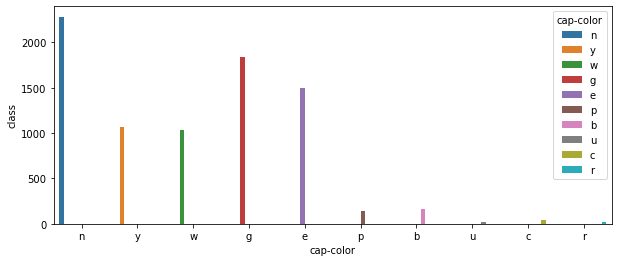

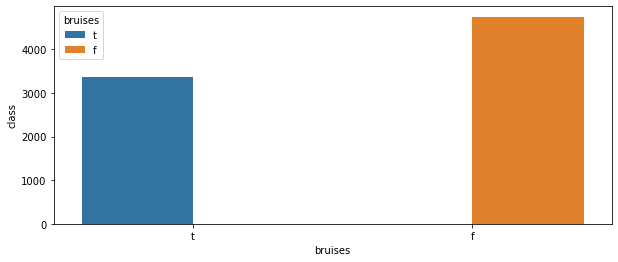

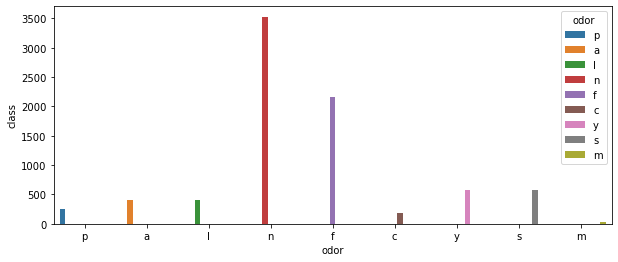

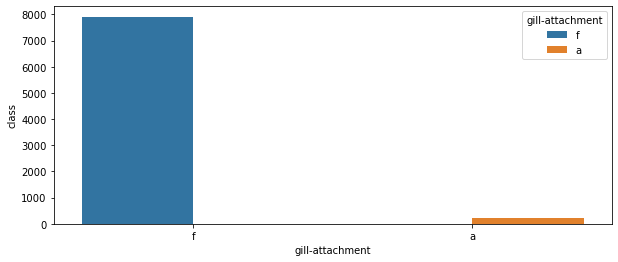

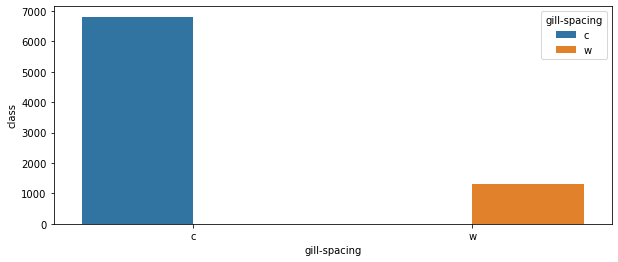

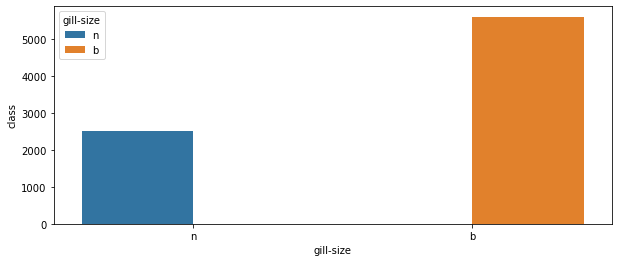

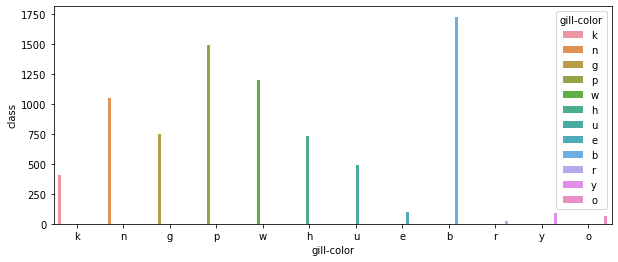

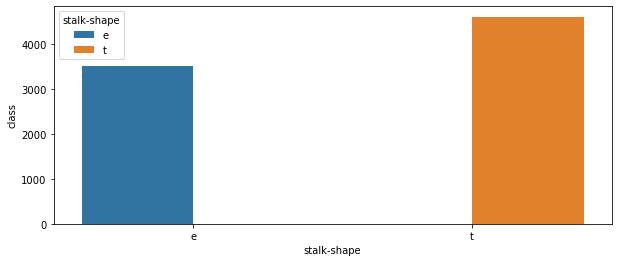

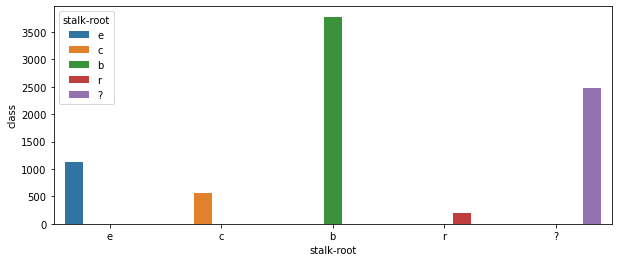

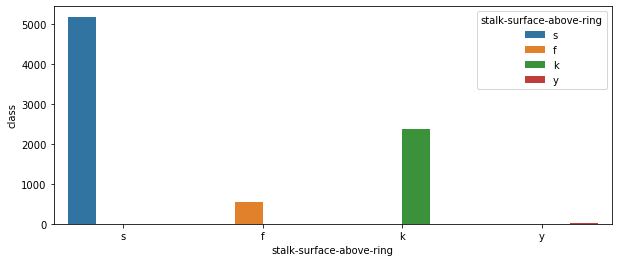

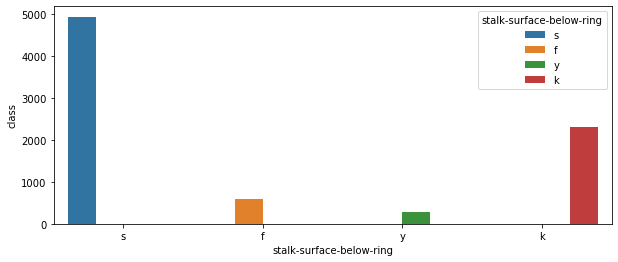

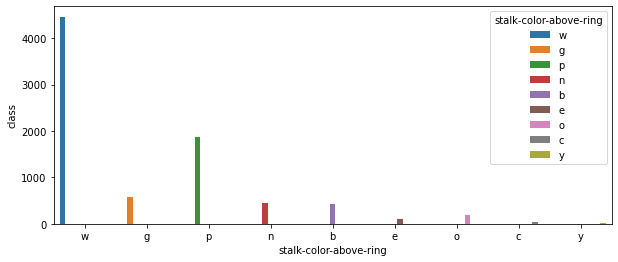

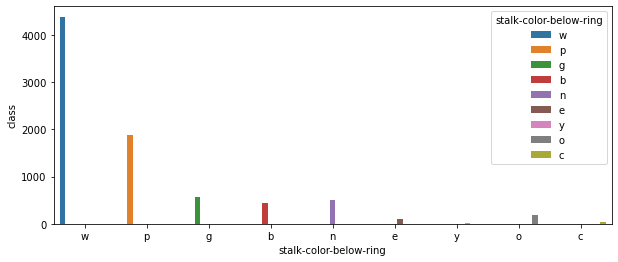

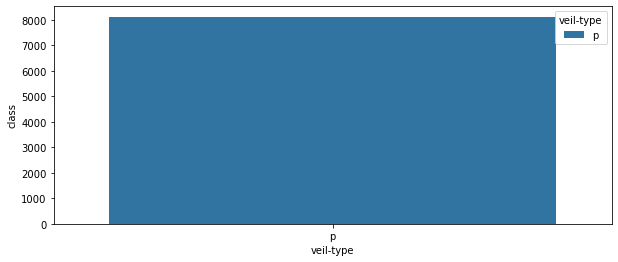

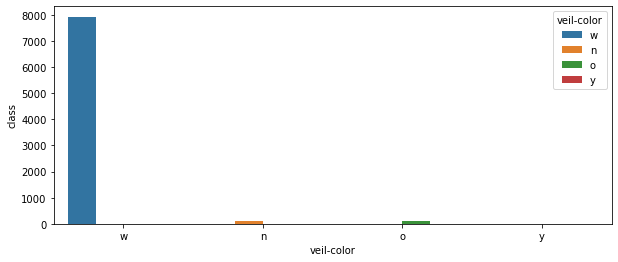

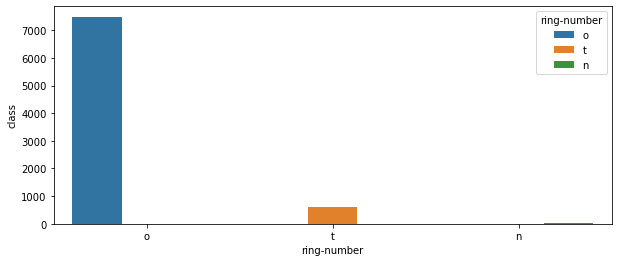

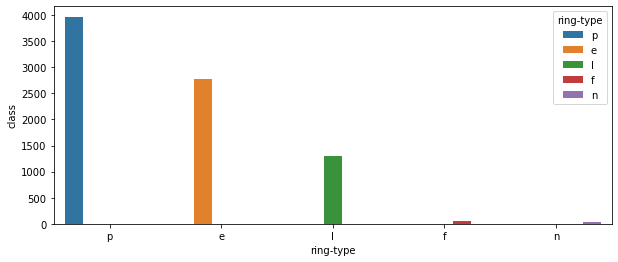

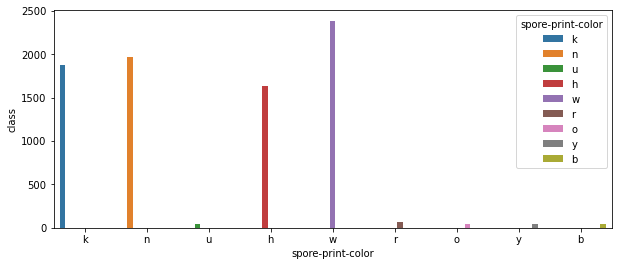

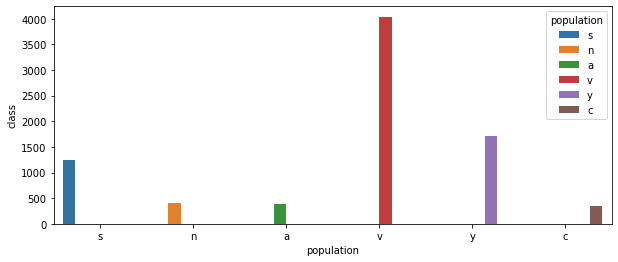

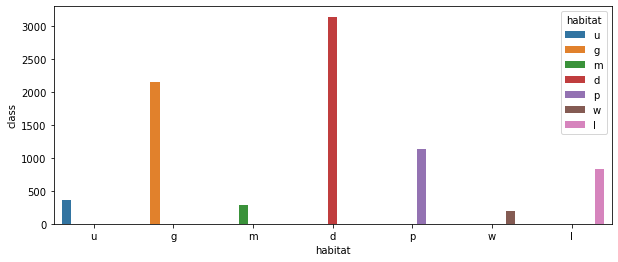

In [281]:
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col,data=df,hue=col)
    plt.xlabel(col)
    plt.ylabel('class')
    plt.show()

Observation:
1. Veiltype has only one default value for all the records, it seems does not contribute to predict the class.
Conslusion: Drop the veiltype column

In [282]:
df.drop(['veil-type'],axis=1,inplace=True)

In [283]:
#Importing Label Encoder to convert the label to binary
from sklearn.preprocessing import LabelEncoder
#converting class of 'p' and 'e' to numbers
lbl_enc=LabelEncoder()
df['class']=lbl_enc.fit_transform(df['class'])
#Creating dummies(one hot encoding) for all other features using pandas get_dummies function
m_cols=df.columns.to_list()
get_dummies=pd.get_dummies(df,columns=m_cols[1:],drop_first=True)
print(get_dummies.shape)
get_dummies.head()
df=get_dummies
df.head()

(8124, 96)


,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [284]:
#Sclaing the feature data
scale=StandardScaler()
X=df.drop(['class'],axis=1)
y=df['class']
X_scale=scale.fit_transform(X)

In [285]:
#Instantiating Logistic Regression
log_reg=LogisticRegression()
#Splitting the data as train and test data. 25% to test data.
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=120)

In [286]:
start=time.time()
log_reg.fit(X_train,y_train)
print("time taken LR: ",time.time()-start,'\n')
y_pred=log_reg.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred),'\n')
print("confusion matrix: \n",confusion_matrix(y_test,y_pred),'\n')
print("classification report: \n",classification_report(y_test,y_pred))

time taken LR:  0.057456016540527344 

accuracy score:  1.0 

confusion matrix: 
 [[1042    0]
 [   0  989]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Conclusion:
1. we got 100% accuracy with logistic regression model

In [287]:
#Regularization
from sklearn.linear_model import RidgeClassifier,RidgeCV
rdg=RidgeCV(alphas=np.arange(0.01,1,0.1))
rdg.fit(X_train,y_train)
rdg_clf=RidgeClassifier(rdg.alpha_)
rdg_clf.fit(X_train,y_train)
y_pred=rdg_clf.predict(X_test)
print("Accuracy using Ridge classifier: ",accuracy_score(y_test,y_pred))

Accuracy using Ridge classifier:  1.0


We got same 100% accuracy with RidgeClassifier also, it shows that our model is not overfitting

ROC-AUC Score:  1.0


<Figure size 288x288 with 0 Axes>

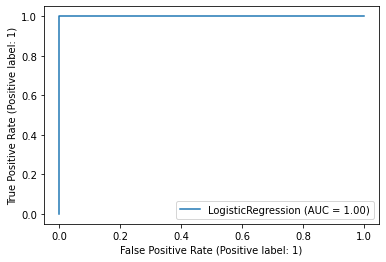

In [288]:
from sklearn.metrics import auc,roc_auc_score,plot_roc_curve
print("ROC-AUC Score: ",roc_auc_score(y_test,y_pred))
plt.figure(figsize=(4,4))
plot_roc_curve(log_reg,X_test,y_test)
plt.show()

As we are getting 100% of accuracy, our ROC-AUC curve covers the complete area.